# SVM Higgs Detection



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import os
from sklearn.metrics import accuracy_score
import joblib
from sklearn.model_selection import GridSearchCV

In [ ]:
import os

# TODO: Fill in the Google Drive path where you uploaded the lab materials
# Example: GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/Lab materials 01-20210104'

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'ColabNotebooks/NN/CourseWork/HiggsDetection_NeuralComputing' 
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
# print(os.listdir(GOOGLE_DRIVE_PATH))

In [ ]:
higgs_df_train = pd.read_csv(GOOGLE_DRIVE_PATH + '/HiggsPreprocessedData.csv')
higgs_df_train.shape

(77006, 29)

In [ ]:
y_train = higgs_df_train['class']
X_train = higgs_df_train.drop(columns='class')

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.10, random_state = 20)

In [ ]:
svm_model1 = SVC(kernel = 'linear')
#Fit the model for the data

SVMClf_1 = svm_model1.fit(X_train, y_train)

In [ ]:
y_preds=SVMClf_1.predict(X_val)
print('Summary for validation set with base model : ')
print(classification_report(y_val, y_preds))

Summary for validation set with base model : 
              precision    recall  f1-score   support

           0       0.67      0.44      0.53      3350
           1       0.63      0.82      0.71      3869

    accuracy                           0.64      7219
   macro avg       0.65      0.63      0.62      7219
weighted avg       0.65      0.64      0.63      7219



In [ ]:
import joblib
#save your model or results
GOOGLE_MODELS_SAVED = GOOGLE_DRIVE_PATH + '/SavedModels/SVM'
joblib.dump(SVMClf_1, GOOGLE_MODELS_SAVED + '/basic_model1_SVM_Higgs.pkl')

SVM basic linear model fit alone took upto 48 minutes to fit and predict. With a large dataset computational time for SVM is more and is not efficient. Further creating multiple models and performing grid search withh be very time consuming. For the purpose of course work, will sample fewer records from the dataset to create and compare models and will fit the whole test set with the best model. 

In [ ]:
higgs_df_sample = higgs_df_train.sample(n = 8000)
higgs_df_sample.shape

(8000, 29)

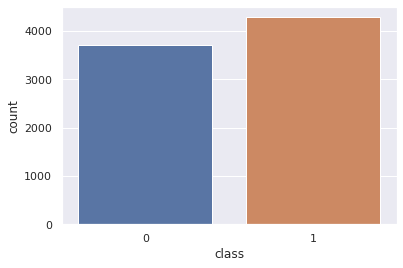

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="class", data=higgs_df_sample)

In [ ]:
y_sample = higgs_df_sample['class']
X_sample = higgs_df_sample.drop(columns='class')

X_train_sample, X_val_sample, y_train_sample, y_val_sample = train_test_split(X_sample, y_sample, test_size = 0.10, random_state = 20)

In [ ]:
X_train_sample.shape

(7200, 28)

In [ ]:
svm_model2 = SVC(kernel = 'linear', C=0.1, gamma=0.1)
#Fit the model for the data

SVMClf_2 = svm_model2.fit(X_train_sample, y_train_sample)

y_preds=SVMClf_2.predict(X_val_sample)
print('Summary on Validation set : ')
print(classification_report(y_val_sample, y_preds))

joblib.dump(SVMClf_2, GOOGLE_MODELS_SAVED + '/SVMClf_2 _model_SVM_Higgs.pkl')

Summary on Validation set : 
              precision    recall  f1-score   support

           0       0.67      0.39      0.50       347
           1       0.65      0.85      0.74       453

    accuracy                           0.65       800
   macro avg       0.66      0.62      0.62       800
weighted avg       0.66      0.65      0.63       800



['drive/My Drive/ColabNotebooks/NN/CourseWork/HiggsDetection_NeuralComputing/SavedModels/SVM/SVMClf_2 _model_SVM_Higgs.pkl']

In [ ]:
# defining parameter range
param_grid = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
 
grid_SVM_model_kernal = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid_SVM_model_kernal = grid_SVM_model_kernal.fit(X_train_sample, y_train_sample)
print()
print("Best parameters set found on development set:")
print()
print(grid_SVM_model_kernal.best_params_)
joblib.dump(grid_SVM_model_kernal, GOOGLE_MODELS_SAVED + '/grid_SVM_model_bestkernal.pkl')

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .....................kernel=linear;, score=0.659 total time=   6.1s
[CV 2/5] END .....................kernel=linear;, score=0.643 total time=   3.5s
[CV 3/5] END .....................kernel=linear;, score=0.633 total time=   3.5s
[CV 4/5] END .....................kernel=linear;, score=0.642 total time=   3.5s
[CV 5/5] END .....................kernel=linear;, score=0.640 total time=   3.4s
[CV 1/5] END ........................kernel=rbf;, score=0.642 total time=   3.2s
[CV 2/5] END ........................kernel=rbf;, score=0.615 total time=   3.2s
[CV 3/5] END ........................kernel=rbf;, score=0.631 total time=   3.2s
[CV 4/5] END ........................kernel=rbf;, score=0.628 total time=   3.2s
[CV 5/5] END ........................kernel=rbf;, score=0.624 total time=   3.2s
[CV 1/5] END .......................kernel=poly;, score=0.624 total time=   2.5s
[CV 2/5] END .......................kernel=poly;,

['drive/My Drive/ColabNotebooks/NN/CourseWork/HiggsDetection_NeuralComputing/SavedModels/SVM/grid_SVM_model_bestkernal.pkl']

In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['linear']}
 
grid_SVM_model_C_gamma = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid_SVM_model_C_gamma = grid_SVM_model_C_gamma.fit(X_train_sample, y_train_sample)
print()
print("Best parameters set found on development set:")
print()
print(grid_SVM_model_C_gamma.best_params_)
joblib.dump(grid_SVM_model_C_gamma, GOOGLE_DRIVE_PATH + '/grid_SVM_model_C_and_gamma.pkl')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.644 total time=   3.7s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.624 total time=   3.2s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.630 total time=   2.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.640 total time=   2.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.628 total time=   2.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.644 total time=   2.1s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.624 total time=   2.1s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.630 total time=   2.1s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.640 total time=   2.1s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.628 total time=   2.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.644 total time=   2.1s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;

['drive/My Drive/ColabNotebooks/NN/CourseWork/HiggsDetection_NeuralComputing/grid_SVM_model_C_and_gamma.pkl']

In [ ]:
svm_model3 = SVC(kernel = 'linear', C = 10 , gamma = 1)
#Fit the model for the data

SVMClf_3 = svm_model3.fit(X_train_sample, y_train_sample)

y_preds = SVMClf_3.predict(X_val_sample)
print('Summary on Validation set : ')
print(classification_report(y_val_sample, y_preds))

joblib.dump(SVMClf_3, GOOGLE_MODELS_SAVED + '/SVMClf_3 _model_SVM_Higgs.pkl')

Summary on Validation set : 
              precision    recall  f1-score   support

           0       0.66      0.44      0.53       347
           1       0.66      0.83      0.73       453

    accuracy                           0.66       800
   macro avg       0.66      0.63      0.63       800
weighted avg       0.66      0.66      0.64       800



['drive/My Drive/ColabNotebooks/NN/CourseWork/HiggsDetection_NeuralComputing/SavedModels/SVM/SVMClf_3 _model_SVM_Higgs.pkl']

## Training on normalized data



In [ ]:
from sklearn import preprocessing

normalized_X_train = X_train_sample
normalized_X_val = X_val_sample

normalized_X_train = preprocessing.normalize(normalized_X_train)
normalized_X_val = preprocessing.normalize(normalized_X_val)

normalized_X_val = preprocessing.normalize(normalized_X_val)

In [ ]:
svm_model31 = SVC(kernel = 'linear', C = 10 , gamma = 1)
#Fit the model for the data

SVMClf_31 = svm_model31.fit(normalized_X_train, y_train_sample)

y_preds = SVMClf_31.predict(normalized_X_val)
print('Summary on Validation set : ')
print(classification_report(y_val_sample, y_preds))

# joblib.dump(SVMClf_3, GOOGLE_MODELS_SAVED + '/SVMClf_3 _model_SVM_Higgs.pkl')

Summary on Validation set : 
              precision    recall  f1-score   support

           0       0.66      0.49      0.56       380
           1       0.63      0.77      0.69       420

    accuracy                           0.64       800
   macro avg       0.64      0.63      0.63       800
weighted avg       0.64      0.64      0.63       800



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train_sample)
# Apply transform to both the training set and the test set.
X_train_sample = scaler.transform(X_train_sample)
X_val_sample = scaler.transform(X_val_sample)

from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

pca.fit(X_train_sample)

X_train_sample = pca.transform(X_train_sample)
X_val_sample = pca.transform(X_val_sample)

X_train_sample.shape

(7200, 23)

In [ ]:
svm_model4 = SVC(kernel = 'linear', C = 10 , gamma = 1)
#Fit the model for the data

SVMClf_4 = svm_model4.fit(X_train_sample, y_train_sample)

y_preds = SVMClf_4.predict(X_val_sample)
print('Summary on Validation set : ')
print(classification_report(y_val_sample, y_preds))

# joblib.dump(SVMClf_4, GOOGLE_MODELS_SAVED + '/SVMClf_4 _model_SVM_Higgs.pkl')

Summary on Validation set : 
              precision    recall  f1-score   support

           0       0.62      0.38      0.47       347
           1       0.63      0.82      0.72       453

    accuracy                           0.63       800
   macro avg       0.63      0.60      0.59       800
weighted avg       0.63      0.63      0.61       800



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train_sample)
# Apply transform to both the training set and the test set.
X_train_sample = scaler.transform(X_train_sample)
X_val_sample = scaler.transform(X_val_sample)

from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.99)

pca.fit(X_train_sample)

X_train_sample = pca.transform(X_train_sample)
X_val_sample = pca.transform(X_val_sample)

X_train_sample.shape

(7200, 27)

In [ ]:
svm_model4 = SVC(kernel = 'linear', C = 10 , gamma = 1)
#Fit the model for the data

SVMClf_4 = svm_model4.fit(X_train_sample, y_train_sample)

y_preds = SVMClf_4.predict(X_val_sample)
print('Summary on Validation set : ')
print(classification_report(y_val_sample, y_preds))

# joblib.dump(SVMClf_4, GOOGLE_MODELS_SAVED + '/SVMClf_4 _model_SVM_Higgs.pkl')

Summary on Validation set : 
              precision    recall  f1-score   support

           0       0.59      0.39      0.47       347
           1       0.63      0.79      0.70       453

    accuracy                           0.62       800
   macro avg       0.61      0.59      0.59       800
weighted avg       0.61      0.62      0.60       800




Prediction accuracy for the normal test dataset with PCA
62.12%


Prediction accuracy for the standardized test dataset with PCA
62.00%


PC 1 without scaling:
[-3.24309922e-03  1.49926486e-02 -1.21846566e-02  7.57171355e-03
  6.00918268e-03 -3.27394097e-03  4.01161438e-02  1.62444608e-04
 -1.59162895e-01 -5.60269113e-03 -1.31761061e-02  7.94920888e-03
 -1.54566946e-01 -1.70598669e-02  3.12528197e-02 -2.89719883e-03
 -3.46989067e-01  7.34971606e-02  2.03995363e-03 -4.04930711e-03
  9.01891437e-01  3.44184169e-02 -7.39968491e-04  1.01493880e-03
 -2.08037336e-02 -7.64407069e-02 -2.02484338e-02 -5.51970138e-03]

PC 1 with scaling:
[ 6.51715631e-02  1.34457039e-02 -4.04833670e-04  1.12997877e-01
 -1.70648508e-02  3.05128526e-01 -5.75391013e-03 -1.03181145e-03
  2.82347857e-02  2.89190867e-01 -1.13235763e-02  5.82754807e-04
  3.61390083e-02  2.26780798e-01 -1.00250514e-02  1.31923359e-02
 -9.30866187e-03  1.43341213e-01  7.94130220e-03  7.11955952e-03
 -3.57464722e-02  2.40850872e-01  3.16

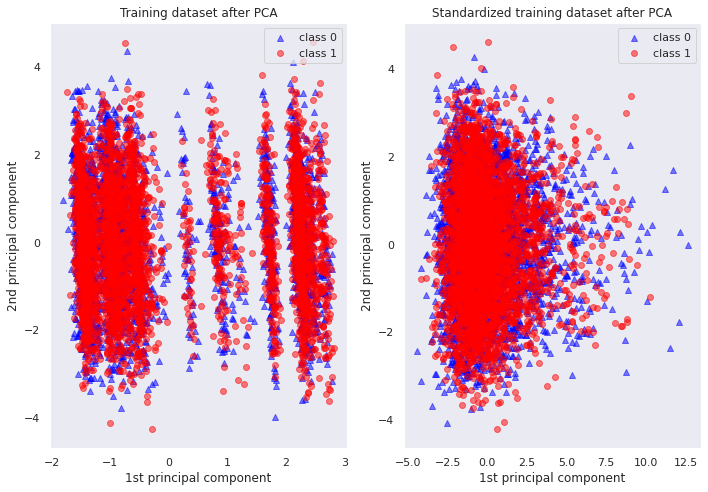

In [ ]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline

# Code source: Tyler Lanigan <tylerlanigan@gmail.com>
#              Sebastian Raschka <mail@sebastianraschka.com>

# License: BSD 3 clause

RANDOM_STATE = 42
FIG_SIZE = (10, 7)


# features, target = load_wine(return_X_y=True)

# Make a train/test split using 30% test size
# X_train, X_test, y_train, y_test = train_test_split(
#     features, target, test_size=0.30, random_state=RANDOM_STATE
# )

# Fit to data and predict using pipelined GNB and PCA
unscaled_clf = make_pipeline(PCA(0.99), SVC(kernel = 'linear', C = 10 , gamma = 1))
unscaled_clf.fit(X_train_sample, y_train_sample)
pred_val = unscaled_clf.predict(X_val_sample)

# Fit to data and predict using pipelined scaling, GNB and PCA
std_clf = make_pipeline(StandardScaler(), PCA(0.99), SVC(kernel = 'linear', C = 10 , gamma = 1))
std_clf.fit(X_train_sample, y_train_sample)
pred_val_std = std_clf.predict(X_val_sample)

# Show prediction accuracies in scaled and unscaled data.
print("\nPrediction accuracy for the normal test dataset with PCA")
print(f"{accuracy_score(y_val, pred_val):.2%}\n")

print("\nPrediction accuracy for the standardized test dataset with PCA")
print(f"{accuracy_score(y_val, pred_val_std):.2%}\n")

# Extract PCA from pipeline
pca = unscaled_clf.named_steps["pca"]
pca_std = std_clf.named_steps["pca"]

# Show first principal components
print(f"\nPC 1 without scaling:\n{pca.components_[0]}")
print(f"\nPC 1 with scaling:\n{pca_std.components_[0]}")

# Use PCA without and with scale on X_train data for visualization.
X_train_transformed = pca.transform(X_train_sample)

scaler = std_clf.named_steps["standardscaler"]
scaled_X_train = scaler.transform(X_train_sample)
X_train_std_transformed = pca_std.transform(scaled_X_train)

# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)

target_classes = [0, 1]
colors = ("blue", "red")
markers = ("^", "o")

for target_class, color, marker in zip(target_classes, colors, markers):
    ax1.scatter(
        x=X_train_transformed[y_train == target_class, 0],
        y=X_train_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

    ax2.scatter(
        x=X_train_std_transformed[y_train == target_class, 0],
        y=X_train_std_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

ax1.set_title("Training dataset after PCA")
ax2.set_title("Standardized training dataset after PCA")

for ax in (ax1, ax2):
    ax.set_xlabel("1st principal component")
    ax.set_ylabel("2nd principal component")
    ax.legend(loc="upper right")
    ax.grid()

plt.tight_layout()

plt.show()

# BEst SVM Model



In [ ]:
svm_model_final = SVC(kernel = 'linear', C = 10 )
# Fit the model for the data

SVMClf_Final = svm_model_final.fit(X_train, y_train)

y_preds = SVMClf_Final.predict(X_val)
print('Summary on Validation set : ')
print(classification_report(y_val, y_preds))

joblib.dump(SVMClf_Final, GOOGLE_MODELS_SAVED + '/SVMClf_Final _model_SVM_Higgs.pkl')

Summary on Validation set : 
              precision    recall  f1-score   support

           0       0.68      0.44      0.54      3573
           1       0.63      0.82      0.71      4128

    accuracy                           0.64      7701
   macro avg       0.65      0.63      0.62      7701
weighted avg       0.65      0.64      0.63      7701



['drive/My Drive/ColabNotebooks/NN/CourseWork/HiggsDetection_NeuralComputing/SavedModels/SVM/SVMClf_Final _model_SVM_Higgs.pkl']

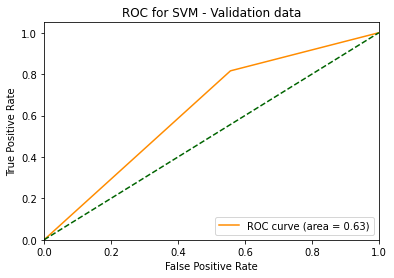

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

SVMVal_fpr, SVMVal_tpr, SVMVal_thresholds = roc_curve(y_val, y_preds)
roc_auc = auc(SVMVal_fpr, SVMVal_tpr)

plt.figure()
plt.plot(SVMVal_fpr, SVMVal_tpr, color="darkorange",
label="ROC curve (area = %0.2f)" % roc_auc,)
plt.plot([0, 1], [0, 1], color="darkgreen",  linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for SVM - Validation data")
plt.legend(loc="lower right")
plt.show()


In [ ]:
svm_model_final = SVC(kernel = 'linear', C=10)
#Fit the model for the data

SVMClf_21 = svm_model_final.fit(X_train_sample, y_train_sample)

y_preds=SVMClf_21.predict(X_val_sample)
print('Summary on Validation set : ')
print(classification_report(y_val_sample, y_preds))

# joblib.dump(SVMClf_2, GOOGLE_MODELS_SAVED + '/SVMClf_21 _model_SVM_Higgs.pkl')

Summary on Validation set : 
              precision    recall  f1-score   support

           0       0.68      0.46      0.55       369
           1       0.64      0.82      0.72       431

    accuracy                           0.65       800
   macro avg       0.66      0.64      0.64       800
weighted avg       0.66      0.65      0.64       800



## *TESTING*



In [ ]:
from joblib import dump, load
TEST_GOOGLE_FOLDER = GOOGLE_DRIVE_PATH + '/SavedModels/Testing'


In [ ]:
X_test = pd.read_csv(TEST_GOOGLE_FOLDER+'/X_test_data.csv')
y_test = pd.read_csv(TEST_GOOGLE_FOLDER+'/y_test_data.csv')

In [ ]:
BestClassifier_SVM = load(TEST_GOOGLE_FOLDER + '/SVMClf_Final _model_SVM_Higgs.pkl') 

In [ ]:
y_preds_test = BestClassifier_SVM.predict(X_test)

print('MLP Accuracy on Test data: ')
print(BestClassifier_SVM.score(X_test, y_test))

print('MLP Results for Test data  : ')
print(classification_report(y_test, y_preds_test))

MLP Accuracy on Test data: 
0.644365119836818
MLP Results for Test data  : 
              precision    recall  f1-score   support

           0       0.68      0.45      0.54      9205
           1       0.63      0.82      0.71     10405

    accuracy                           0.64     19610
   macro avg       0.66      0.63      0.63     19610
weighted avg       0.65      0.64      0.63     19610



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


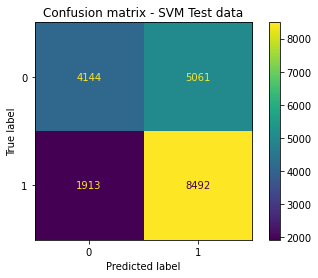

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(BestClassifier_SVM, X_test, y_test)  
plt.title('Confusion matrix - SVM Test data')
plt.show()

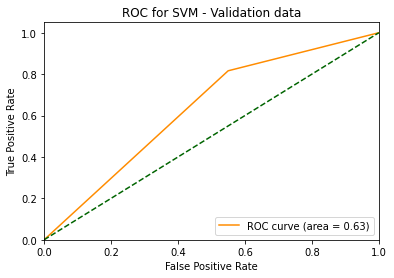

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

SVMTEST_fpr, SVMTEST_tpr, SVMTEST_thresholds = roc_curve(y_test, y_preds_test)
roc_auc = auc(SVMTEST_fpr, SVMTEST_tpr)

plt.figure()
plt.plot(SVMTEST_fpr, SVMTEST_tpr, color="darkorange",
label="ROC curve (area = %0.2f)" % roc_auc,)
plt.plot([0, 1], [0, 1], color="darkgreen",  linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for SVM - Validation data")
plt.legend(loc="lower right")
plt.show()


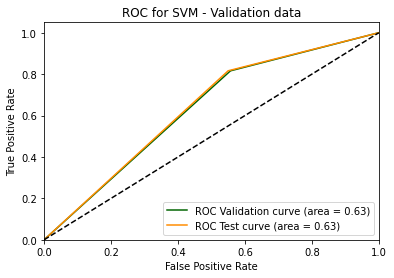

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

SVMTEST_fpr, SVMTEST_tpr, SVMTEST_thresholds = roc_curve(y_test, y_preds_test)
roc_auc = auc(SVMTEST_fpr, SVMTEST_tpr)

plt.figure()
plt.plot(SVMVal_fpr, SVMVal_tpr, color="darkgreen",
label="ROC Validation curve (area = %0.2f)" % roc_auc,)
plt.plot(SVMTEST_fpr, SVMTEST_tpr, color="darkorange",
label="ROC Test curve (area = %0.2f)" % roc_auc,)
plt.plot([0, 1], [0, 1], color="black",  linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for SVM - Validation data")
plt.legend(loc="lower right")
plt.show()
